# Importing the Dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Data Import & It's Analysis

In [14]:
customer_data = pd.read_csv(r"C:\Users\ASUS\Downloads\archive (14)\Mall_Customers.csv")

In [15]:
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.0,Male,19.0,15.0,39.0
1,2.0,Male,21.0,NaN,81.0
2,3.0,Female,20.0,16.0,6.0
3,4.0,Female,23.0,16.0,77.0
4,5.0,Female,31.0,17.0,40.0


In [16]:
customer_data.shape

(202, 5)

In [17]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              200 non-null    float64
 1   Gender                  200 non-null    object 
 2   Age                     200 non-null    float64
 3   Annual Income (k$)      195 non-null    float64
 4   Spending Score (1-100)  200 non-null    float64
dtypes: float64(4), object(1)
memory usage: 8.0+ KB


# Checking for NULL Values in Dataset

In [18]:
customer_data.isnull().sum()

CustomerID                2
Gender                    2
Age                       2
Annual Income (k$)        7
Spending Score (1-100)    2
dtype: int64

# Different Statistic values

In [72]:
customer_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,202.000000,202.000000,202.000000,202.000000
mean,100.108403,39.068799,60.948718,50.306423
std,57.724152,14.071342,25.301121,25.716865
min,1.000000,18.000000,15.000000,1.000000
25%,51.250000,29.000000,43.000000,35.000000
50%,99.500000,36.000000,60.974359,50.000000
75%,149.750000,49.000000,77.750000,72.750000
max,200.000000,70.000000,137.000000,99.000000


# Fill null values with Mean value

In [71]:
customer_data.fillna(value=customer_data["Annual Income (k$)"].mean())
  

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.000000,Male,19.000000,15.000000,39.000000
1,2.000000,Male,21.000000,60.948718,81.000000
2,3.000000,Female,20.000000,16.000000,6.000000
3,4.000000,Female,23.000000,16.000000,77.000000
4,5.000000,Female,31.000000,17.000000,40.000000
...,...,...,...,...,...
197,198.000000,Male,32.000000,126.000000,74.000000
198,199.000000,Male,32.000000,137.000000,18.000000
199,200.000000,Male,30.000000,137.000000,83.000000
200,60.948718,60.948718,60.948718,60.948718,60.948718


# Check Null values are filled with mean or not

In [40]:
customer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# Data segmentation choosing "Annual Income" & "Spending Score" columns 

In [65]:
X = customer_data.iloc[:,[3,4]].values

In [66]:
print(X)

[[ 15.          39.        ]
 [ 60.94871795  81.        ]
 [ 16.           6.        ]
 [ 16.          77.        ]
 [ 17.          40.        ]
 [ 17.          76.        ]
 [ 18.           6.        ]
 [ 18.          94.        ]
 [ 19.           3.        ]
 [ 60.94871795  72.        ]
 [ 19.          14.        ]
 [ 19.          99.        ]
 [ 20.          15.        ]
 [ 20.          77.        ]
 [ 20.          13.        ]
 [ 20.          79.        ]
 [ 21.          35.        ]
 [ 21.          66.        ]
 [ 23.          29.        ]
 [ 23.          98.        ]
 [ 24.          35.        ]
 [ 24.          73.        ]
 [ 25.           5.        ]
 [ 25.          73.        ]
 [ 28.          14.        ]
 [ 28.          82.        ]
 [ 28.          32.        ]
 [ 28.          61.        ]
 [ 29.          31.        ]
 [ 29.          87.        ]
 [ 60.94871795   4.        ]
 [ 30.          73.        ]
 [ 33.           4.        ]
 [ 33.          92.        ]
 [ 33.        

# Calculating wcss value for different number of clusters

In [67]:

wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(X)

  wcss.append(kmeans.inertia_)

C:\Users\ASUS\anaconda3\New folder\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


# Elbow graph to find optimum Number of Clusters

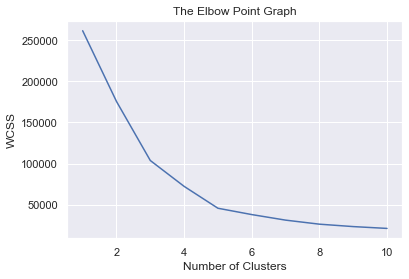

In [68]:
sns.set()
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Training the k-Means Clustering Model

In [69]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)


Y = kmeans.fit_predict(X)

print(Y)

[4 2 4 3 4 3 4 3 4 1 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 0 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 1 1]


# Visualization of  all the Clusters

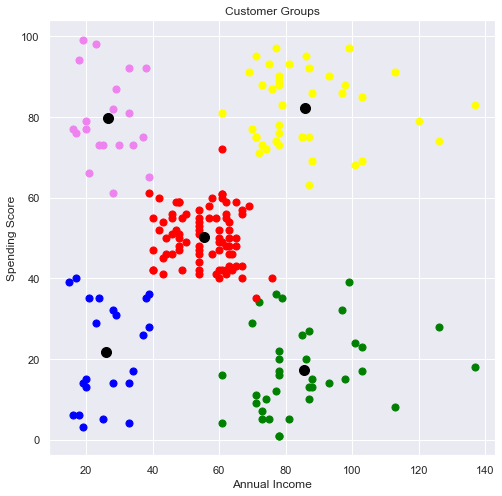

In [48]:
plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='yellow', label='Cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c='violet', label='Cluster 4')
plt.scatter(X[Y==4,0], X[Y==4,1], s=50, c='blue', label='Cluster 5')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='black', label='Centroids')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()